In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math  # for rounding up values
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime  # for strptime
import datetime
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_1.csv', converters={'PARTY_ID': str})
df['ETD_POL_D'] = pd.to_datetime(df['ETD_POL_D'])
df.head(10)
df.info()
print(f'Dataset size: {df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int64         
 5   CNTR_TYPE  108465 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.0+ MB
Dataset size: (108465, 6)


In [2]:
sel_port = "AEDXB"
sel_cntr_size = 40
sel_cntr_type = "HC"
sel_party = "01002788"

# Getting pod id "AEDXB"
sel_port_df = df[df["POD_ID"] == sel_port]

# Getting container size 40 data
cntr_size_grp = sel_port_df.groupby(sel_port_df['CNTR_SIZE'])
cntr_size_40 = cntr_size_grp.get_group(sel_cntr_size)

# Getting container type HC data
cntr_type_grp = cntr_size_40.groupby(cntr_size_40['CNTR_TYPE'])
cntr_hc = cntr_type_grp.get_group(sel_cntr_type)

# Getting party id: 01002788 data
sel_cntr = cntr_hc.groupby(cntr_size_40['PARTY_ID'])
cntr_df = sel_cntr.get_group(sel_party)

cntr_df = cntr_df.sort_values(by='ETD_POL_D', ascending=True)

cntr_df.head(5)
cntr_df.tail(5)
print(len(cntr_df))
cntr_df.info()


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
30509,1500.0,01002788,AEDXB,2005-07-24,40,HC
65839,700.0,01002788,AEDXB,2009-03-07,40,HC
65840,700.0,01002788,AEDXB,2009-03-07,40,HC
67534,850.0,01002788,AEDXB,2009-03-10,40,HC
67009,850.0,01002788,AEDXB,2009-04-09,40,HC


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
108275,150.0,01002788,AEDXB,2022-10-19,40,HC
108276,150.0,01002788,AEDXB,2022-10-19,40,HC
104921,6800.0,01002788,AEDXB,2022-11-01,40,HC
106150,5100.0,01002788,AEDXB,2022-12-04,40,HC
17290,3600.0,01002788,AEDXB,2022-12-08,40,HC


1032
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 30509 to 17290
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   COST_RATE  1032 non-null   float64       
 1   PARTY_ID   1032 non-null   object        
 2   POD_ID     1032 non-null   object        
 3   ETD_POL_D  1032 non-null   datetime64[ns]
 4   CNTR_SIZE  1032 non-null   int64         
 5   CNTR_TYPE  1032 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [3]:
# Removing 2005 as it is an outlier
cntr_df = cntr_df[cntr_df['ETD_POL_D'].dt.year != 2005]
cntr_df = cntr_df.dropna().reset_index(drop=True)
cntr_df = cntr_df[cntr_df['COST_RATE'] != 'NAT']
cntr_df = cntr_df.reset_index(drop=True)


In [4]:
column = ['ETD_POL_D', 'COST_RATE']
sel_cntr_df = pd.DataFrame(cntr_df[column])


In [5]:
# Convert the date column to datetime and extract the year and month
sel_cntr_df['year_month'] = sel_cntr_df['ETD_POL_D'].dt.strftime('%Y-%m')

# Group the data by year and month and calculate the average cost rate
sel_cntr_df = sel_cntr_df.groupby('year_month').mean()
sel_cntr_df = sel_cntr_df.reset_index()

sel_cntr_df['year_month'] = pd.to_datetime(sel_cntr_df['year_month'])
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()


C:\Users\it1\AppData\Local\Temp\ipykernel_32956\2966728891.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sel_cntr_df = sel_cntr_df.groupby('year_month').mean()


,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.000000
153,2022-09-01,5433.333333
154,2022-10-01,150.000000
155,2022-11-01,6800.000000
156,2022-12-01,4350.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [6]:
# Setting cost rate to 2dp
sel_cntr_df['COST_RATE'] = sel_cntr_df['COST_RATE'].apply(
    lambda x: round(x, 2))
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()


,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.00
153,2022-09-01,5433.33
154,2022-10-01,150.00
155,2022-11-01,6800.00
156,2022-12-01,4350.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [7]:
sel_cntr_df.set_index('year_month', inplace=True)
sel_cntr_df.head()
sel_cntr_df.tail()


,COST_RATE
year_month,
2009-03-01,750.0
2009-04-01,850.0
2009-05-01,670.0
2009-06-01,700.0
2009-07-01,850.0


,COST_RATE
year_month,
2022-08-01,4816.00
2022-09-01,5433.33
2022-10-01,150.00
2022-11-01,6800.00
2022-12-01,4350.00


<AxesSubplot: xlabel='year_month'>

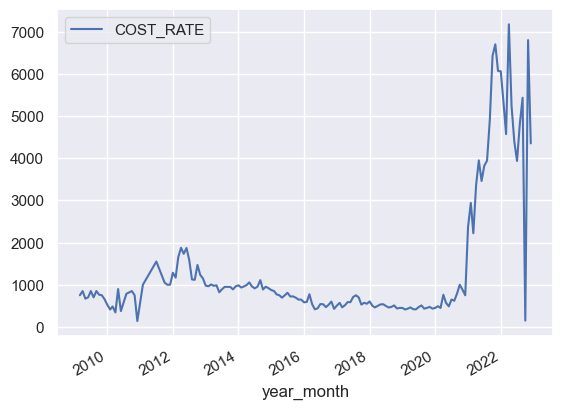

In [8]:
sel_cntr_df.plot()


In [9]:
# from statsmodels.tsa.arima.model import ARIMA
# import pmdarima as pm

# # Fit the Auto ARIMA model
# model = pm.auto_arima(sel_cntr_df['COST_RATE'], seasonal=True, suppress_warnings=True, error_action="ignore", stepwise=True, trace=True, test='adf')
# model.summary()

# # Forecast the future values
# # forecast = model.predict(n_periods=10)
# # print(forecast)

In [10]:
# # Forecast next 24 months
# n_periods = 24
# fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc=pd.date_range(sel_cntr_df.index[-1], periods=n_periods, freq='MS')

# # make series for plotting purpose
# fitted_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot the forecast
# plt.plot(sel_cntr_df)
# plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("Final Forecast of COST_RATE")
# plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Fit the Auto ARIMA model
model = pm.auto_arima(sel_cntr_df['COST_RATE'], seasonal=True, suppress_warnings=True, error_action="ignore", stepwise=True, trace=True, test='adf')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.088, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2540.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2480.906, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2476.877, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2538.664, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2460.228, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2463.885, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2470.196, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2454.454, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2462.603, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2453.084, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2449.630, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2463.606, Time=0.14 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2445.519, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -1207.399
Date:                Mon, 06 Feb 2023   AIC                           2436.798
Time:                        08:37:25   BIC                           2470.347
Sample:                             0   HQIC                          2450.424
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     55.4304    340.368      0.163      0.871    -611.678     722.539
ar.L1         -2.2292      0.123    -18.160      0.000      -2.470      -1.989
ar.L2         -2.7602      0.266    -10.390      0.000      -3.281      -2.240
ar.L3         -1.8543      0.251     -7.376      0.000      -2.347      -1.362
ar.L4         -0.7362      0.139     -5.299      0.000      -1.008      -0.464
ma.L1          1.6782      0.156     10.751      0.000       1.372       1.984
ma.L2          1.4575      0.240      6.061      0.000       0.986       1.929
ma.L3          0.5897      0.217      2.721      0.007       0.165       1.014
ma.L4          0.1001      0.184      0.543      0.587      -0.261       0.462
ma.L5          0.2073      0.126      1.647      0.100      -0.039       0.454
sigma2      3.535e+05   4.85e+04      7.295      0.000    2.59e+05    4.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               558.82
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               7.00   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

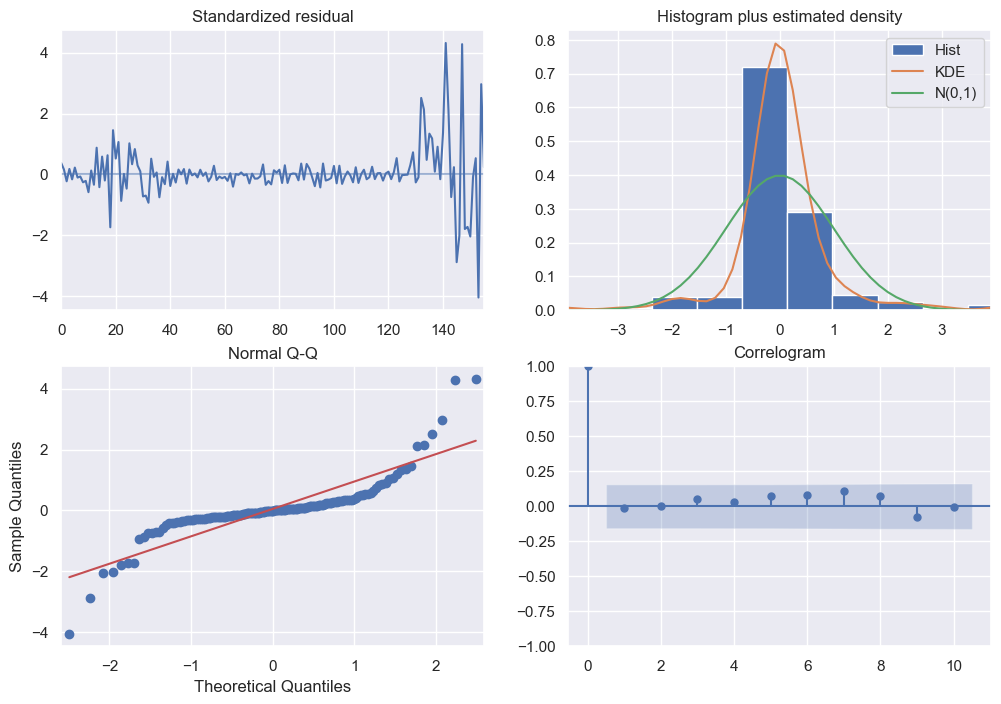

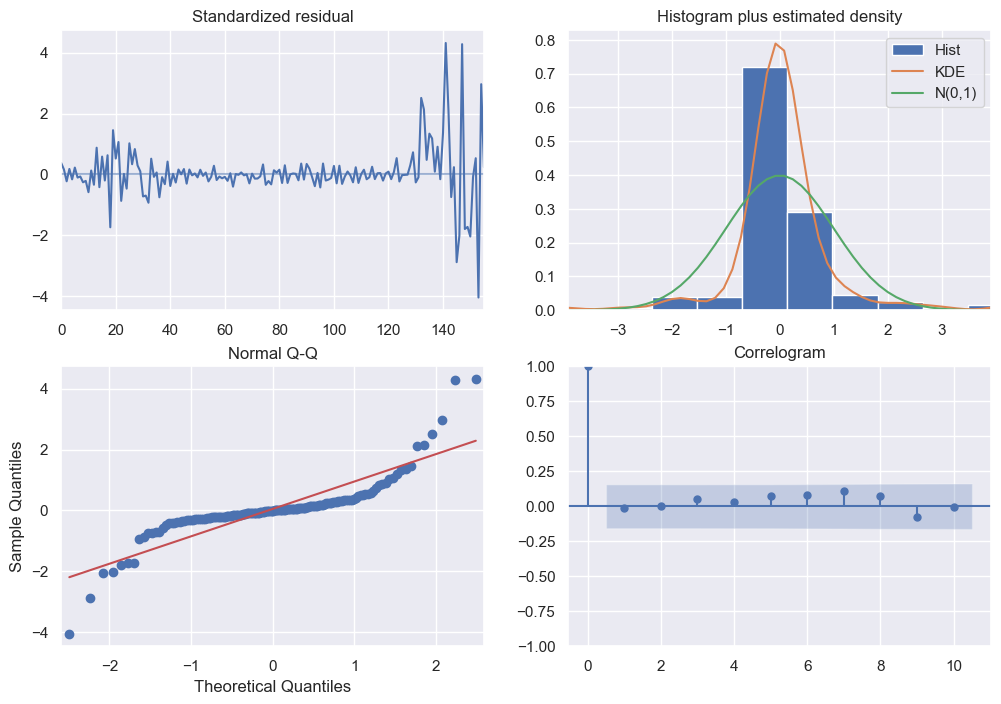

In [12]:
model.plot_diagnostics(figsize=(12,8))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance until the last part where the variance spiked.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. The distribution is slightly skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. 

In [13]:
n_periods = 24

# Create a data frame for the forecast for the next 24 months
index_of_fc = pd.date_range(sel_cntr_df.index[-1], periods = n_periods+1, freq='MS')
fc_df = pd.DataFrame(index=index_of_fc[1:],columns=sel_cntr_df.columns)
fc_df.iloc[1:]

fc_df.head()
fc_df.tail()
fc_df.shape

,COST_RATE
2023-02-01,NaN
2023-03-01,NaN
2023-04-01,NaN
2023-05-01,NaN
2023-06-01,NaN
2023-07-01,NaN
2023-08-01,NaN
2023-09-01,NaN
2023-10-01,NaN
2023-11-01,NaN


,COST_RATE
2023-01-01,NaN
2023-02-01,NaN
2023-03-01,NaN
2023-04-01,NaN
2023-05-01,NaN


,COST_RATE
2024-08-01,NaN
2024-09-01,NaN
2024-10-01,NaN
2024-11-01,NaN
2024-12-01,NaN


(24, 1)

In [14]:
import datetime
start_index = datetime.datetime(2023, 1, 1)
end_index  = datetime.datetime(2024, 12, 1)

# Forecast the future values
forecast = model.predict(n_periods=n_periods)

forecast_array = forecast.values
print(forecast_array)
print(len(forecast_array))

fc_df['COST_RATE'] = forecast_array
fc_df['COST_RATE'] = fc_df['COST_RATE'].apply(lambda x: round(x, 2))
fc_df.head()

[2265.57009934 6360.89520216 2450.09966474 5968.00430537 2946.18176122
 4264.38267313 6078.14509776 1465.2230624  6577.71663934 3635.44589703
 3356.46548229 6071.17522976 2537.02892181 5660.93337382 3679.17862299
 4084.37320424 5515.87675377 2636.68997119 5866.73647386 3716.26433842
 3934.79341086 5569.12043422 2987.74944054 5464.39926638]
24


c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,COST_RATE
2023-01-01,2265.57
2023-02-01,6360.90
2023-03-01,2450.10
2023-04-01,5968.00
2023-05-01,2946.18


<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Final Forecast of COST_RATE')

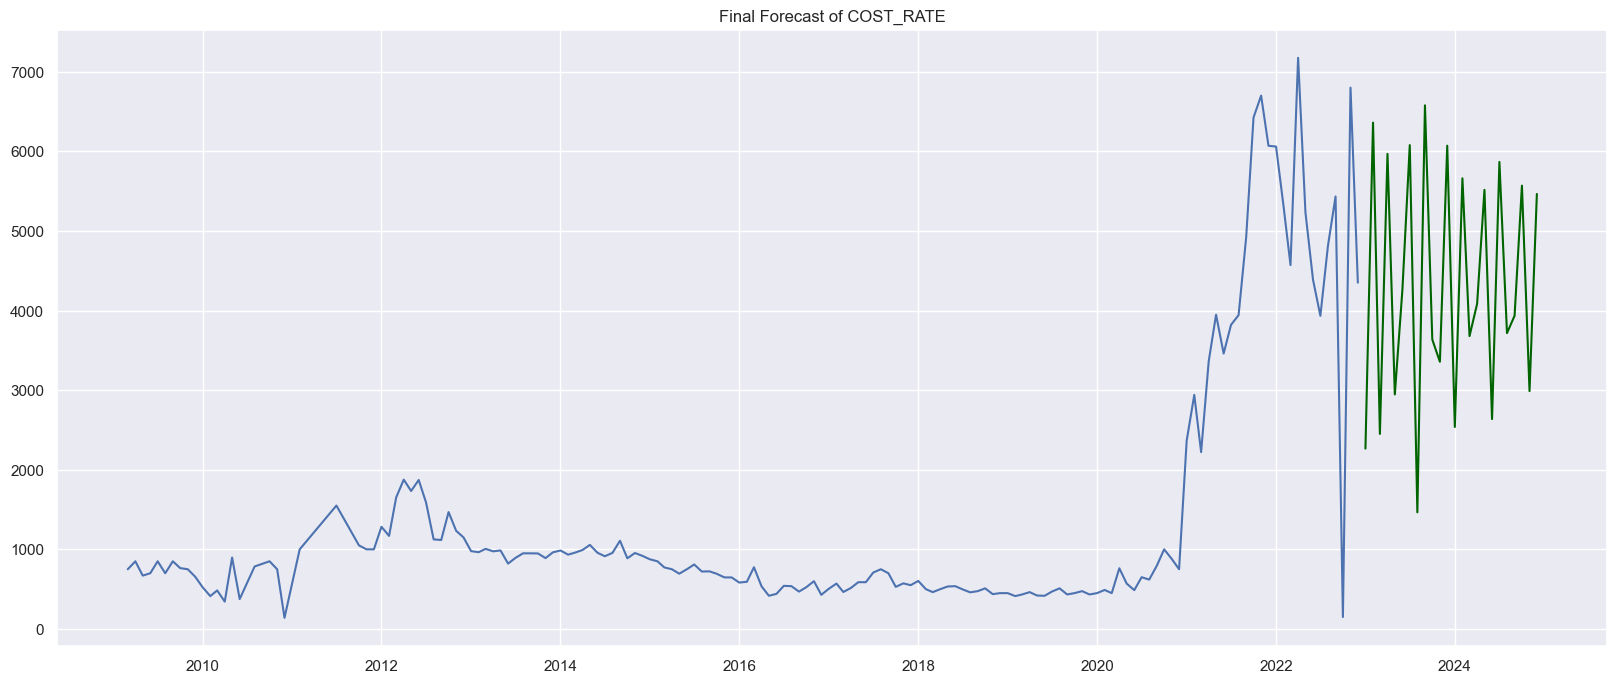

In [15]:
# future_df=pd.concat([sel_cntr_df,fc_df])

# Plot the forecast with current dataset
plt.figure(figsize=(20, 8))
plt.plot(sel_cntr_df)
plt.plot(fc_df, color='darkgreen')
plt.title("Final Forecast of COST_RATE")
plt.show()

In [16]:
fc_df.sort_values(by='COST_RATE', ascending=True, inplace=True)

print("The lowest cost rate forecast is on: ")
fc_df.head(3)
print("\n")

print("The highest cost rate forecast is on: ")
fc_df.tail(3)


The lowest cost rate forecast is on: 


,COST_RATE
2023-08-01,1465.22
2023-01-01,2265.57
2023-03-01,2450.10




The highest cost rate forecast is on: 


,COST_RATE
2023-07-01,6078.15
2023-02-01,6360.90
2023-09-01,6577.72


In [17]:
# Forecasted Cost_Rate
fc_df.head(24)

,COST_RATE
2023-08-01,1465.22
2023-01-01,2265.57
2023-03-01,2450.10
2024-01-01,2537.03
2024-06-01,2636.69
2023-05-01,2946.18
2024-11-01,2987.75
2023-11-01,3356.47
2023-10-01,3635.45
2024-03-01,3679.18
